In [53]:
import random
import numpy as np

input_dim = 56
input_ch = 24
n_bit = 8

input_1_r = []
input_2_r = []
for i in range(input_dim*input_dim*input_ch):
    input_1_r.append(random.gauss(0, 1))
    input_2_r.append(random.gauss(0, 1))

input_1_r = np.asarray(input_1_r)
input_2_r = np.asarray(input_2_r)

In [67]:
S1 = (max(input_1_r))/(2**(n_bit-1))
S2 = (max(input_2_r))/(2**(n_bit-1)) 
print(S1, S2)

0.03268343250462747 0.03313738433794146


In [59]:
input_1_q = np.rint(input_1_r/S1)
input_2_q = np.rint(input_2_r/S2)

In [63]:
output_r = input_1_r + input_2_r
S3 = max(output_r)/(2**(n_bit-1))

In [136]:
output_1 = input_1_q*S1 + input_2_q*S2

In [137]:
print(output_r[:10])
print(output_1[:10])

[-2.29716013  0.61822773 -0.25719122  1.13757829  1.01372122 -0.19189394
 -0.13694467  1.77909589 -1.06899343 -0.91391769]
[-2.2687754   0.61417594 -0.25238842  1.12031574  1.03361424 -0.17476596
 -0.16477902  1.77806996 -1.09080997 -0.92285219]


In [173]:
data = S1/S3
print(data)
n_exp = 0
while data >= 1 or data < 0.5:
    if data >=1:
        data /= 2
        n_exp += 1
    else:
        data *= 2
        n_exp -= 1
m_zero_res = np.round(data*2**31)
print(m_zero_res, data*2**31)
m_zero_res = m_zero_res/2**31*2**n_exp
print(m_zero_res, n_exp)

0.6679005695616476
1434305552.0 1434305551.6235247
0.6679005697369576 0


In [171]:
data = S2/S1
print(data)
n_exp = 0
while data >= 1 or data < 0.5:
    if data >=1:
        data /= 2
        n_exp += 1
    else:
        data *= 2
        n_exp -= 1
n_res = n_exp
res_factor = np.round(data*2**31)
print(res_factor, n_res)
res_factor = res_factor/2**31*2**n_res
print(res_factor)

1.013889356121017
1088655407.0 1
1.0138893565163016


In [172]:
res_factor_32 = 1088655407
print(res_factor_32* input_2_q[:10]/2**31*2**n_res)

[-30.4166807  -15.20834035  20.27778713  20.27778713  45.62502104
 -25.34723391  -3.04166807  29.40279134 -27.37501263  55.76391461]


In [140]:
scaled_in2 = np.rint(res_factor*input_2_q*2**31)
scaled_in2 /= 2**31
print(scaled_in2[:10], res_factor*input_2_q[:10])

[-30.4166807  -15.20834035  20.27778713  20.27778713  45.62502104
 -25.34723391  -3.04166807  29.40279134 -27.37501263  55.76391461] [-30.4166807  -15.20834035  20.27778713  20.27778713  45.62502104
 -25.34723391  -3.04166807  29.40279134 -27.37501263  55.76391461]


In [177]:
output_quant = m_zero_res * (input_1_q + scaled_in2)
output_quant = (np.rint(output_quant))

[]

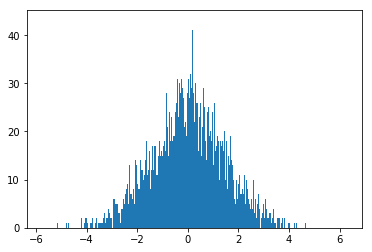

In [155]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(output_r, bins=10000)

ax.plot()

[]

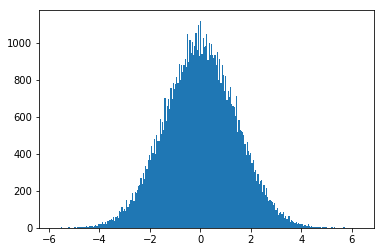

In [156]:
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(output_quant*S3, bins=255)

ax.plot()

In [134]:
output_fq2 = np.rint(output_fq1/S3) * S3

In [178]:
print(output_r[:10])
print(S3*output_quant[:10])

[-2.29716013  0.61822773 -0.25719122  1.13757829  1.01372122 -0.19189394
 -0.13694467  1.77909589 -1.06899343 -0.91391769]
[-2.25099059  0.63614951 -0.24467289  1.12549529  1.02762614 -0.19573831
 -0.14680373  1.76164481 -1.07656072 -0.92975698]


In [179]:
z_out = min(output_quant)
output_q2 = output_quant - z_out
print(z_out, max(np.rint(output_q2)))

-118.0 246.0


In [180]:
print((np.rint(output_q2[:10])))

[ 72. 131. 113. 141. 139. 114. 115. 154.  96.  99.]


In [183]:
input_1 = []
input_2 = []
str_in1 = '#define INPUT11 { \\\n'
str_in2 = '#define INPUT12 { \\\n'
for i in range(input_dim*input_dim*input_ch):
    temp1 = int(random.gauss(127,30))
    input_1.append(temp1)
    temp2 = int(random.gauss(127,30))
    input_2.append(temp2)
    
    str_in1 += str(input_1[i]) + ', '
    str_in2 += str(input_2[i]) + ', '
    
    if (i % input_dim*input_ch) == 0 and i!=0:
        str_in1 += '\\\n'
        str_in2 += '\\\n'
    
str_in1 = str_in1[:-2] + '}  \n \n'
str_in2 = str_in2[:-2] + '}  \n \n'

In [184]:
f = open("res_test.h", "w") 
f.write(str_in1 + str_in2) 
f.close()